# WITH SEABORN

In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [61]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [62]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [64]:
kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
652,784,Manuel Soriano,27/08/15,shot,contractor's level,29.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False
2154,2399,George Lee Seeton,04/03/17,shot,vehicle,38.0,M,W,Oklahoma City,OK,False,attack,Car,True
1779,1990,Roy Lee Richards,25/10/16,shot,toy weapon,46.0,M,B,Little Rock,AR,False,other,Not fleeing,False
2396,2658,Eleuterio Amaya-Torres,12/06/17,shot,gun,63.0,M,H,Plano,TX,False,attack,Not fleeing,False
58,108,Orlando Jude Lopez,25/01/15,shot,gun,26.0,M,H,Pueblo,CO,False,attack,Car,False
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
206,295,Jamison Childress,19/03/15,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False
2314,2573,TK TK,11/05/17,shot,gun,NaN,M,H,Arlington,TX,False,attack,Not fleeing,False
495,618,Joshua Blough,07/07/15,shot,knife,28.0,M,W,Elizabethtown,KY,False,other,Not fleeing,False
1218,1396,Dylan Pape,21/03/16,shot,toy weapon,25.0,M,W,Stamford,CT,True,attack,Not fleeing,False


In [63]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.shape

(2535, 14)

(2535, 14)

In [17]:
kill.dropna(inplace=True)
kill.shape

(2254, 14)

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [25]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [26]:
kill["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

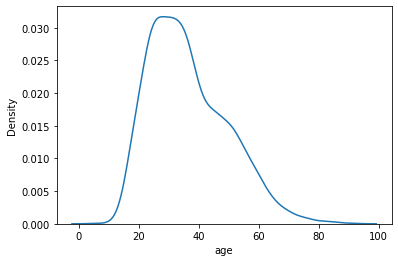

In [65]:
sns.kdeplot(kill.age);

In [66]:
kill.skew(skipna=True)

id                        -0.014277
age                        0.714931
signs_of_mental_illness    1.157208
body_camera                2.545901
dtype: float64

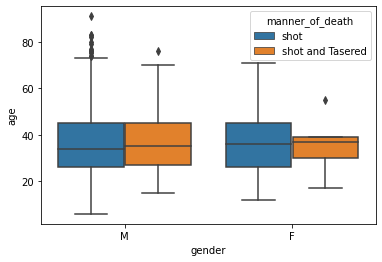

In [27]:
sns.boxplot(data=kill,x="gender",y="age", hue="manner_of_death");

[Text(0, 0.5, '')]

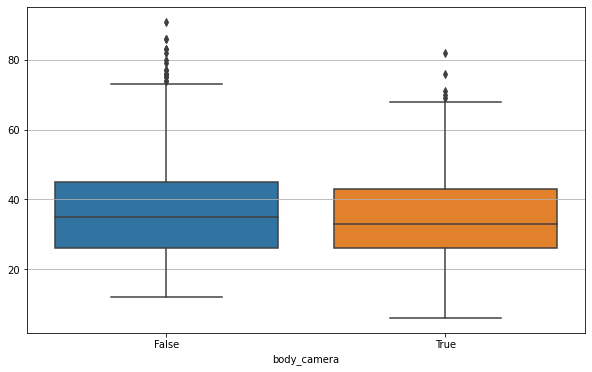

In [67]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x="body_camera",y="age",data=kill,ax=ax)
ax.yaxis.grid(True)
ax.set(ylabel="")

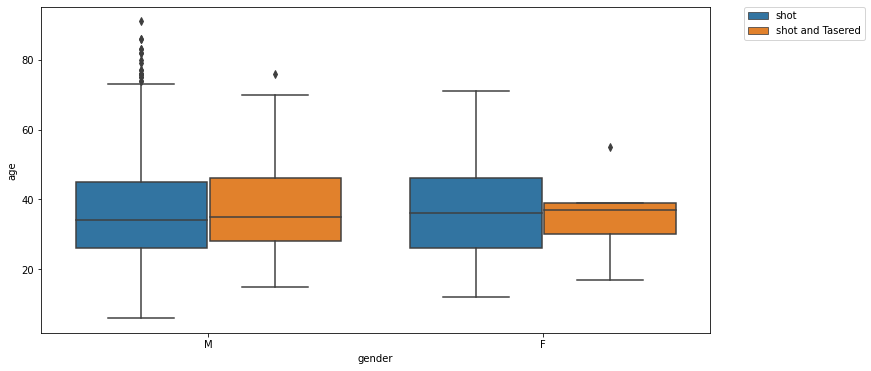

In [73]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(x="gender",y="age",data=kill,hue="manner_of_death")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", borderaxespad = 0);

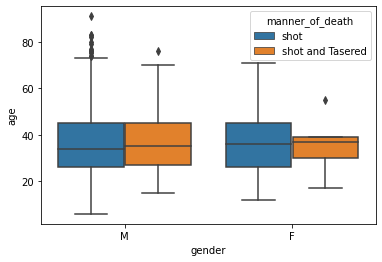

In [ ]:
# with seaborn


## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

In [74]:
Means = kill.groupby('gender')['age'].mean()
Medians = kill.groupby('gender')['age'].median()
Modes = kill.groupby('gender')['age'].apply(lambda x: pd.Series.mode(x)[0]) 
print("means", Means, sep ="/", end = "\n\n")
print("medians", Medians, sep ="/", end = "\n\n")
print("modes", Modes, sep ="/", end = "\n\n")

means/gender
F    36.567308
M    36.607052
Name: age, dtype: float64

medians/gender
F    36.0
M    34.0
Name: age, dtype: float64

modes/gender
F    25.0
M    25.0
Name: age, dtype: float64



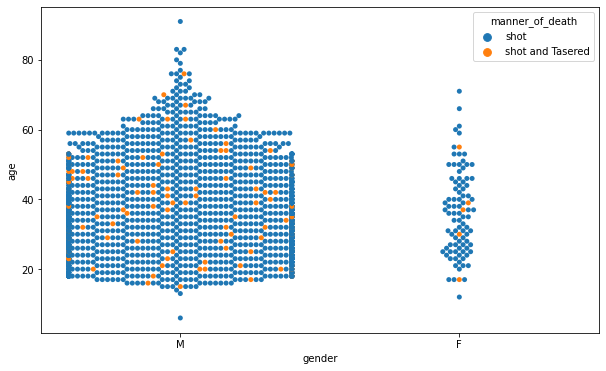

In [28]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=kill,x="gender",y="age", hue="manner_of_death");

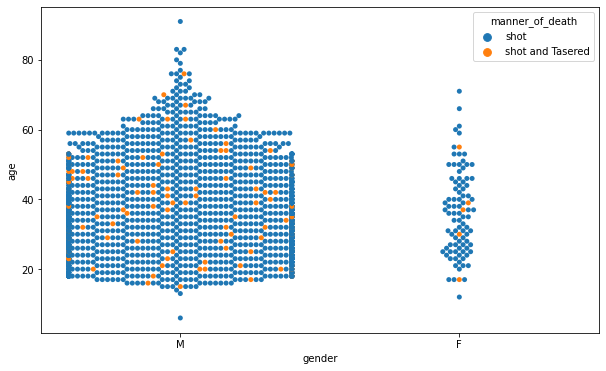

In [ ]:
# with seaborn


## 2: Plot 12 most dangerous cities

In [29]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [58]:
kill["city"].value_counts().head(12)

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
Indianapolis     14
St. Louis        14
Oklahoma City    13
Name: city, dtype: int64

In [73]:
kill.city.nunique()

1282

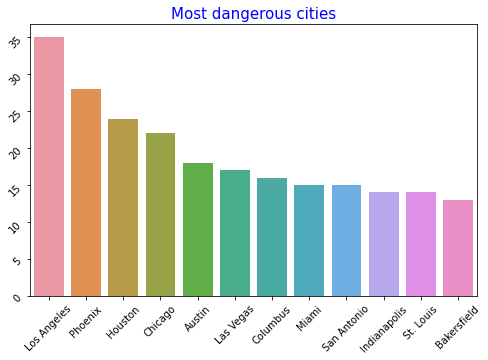

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(data=kill, y=kill['city'].value_counts().iloc[:12].values,x=kill['city'].value_counts().iloc[:12].index);
plt.tick_params(rotation=45)
plt.title("Most dangerous cities", color="blue", size=15);

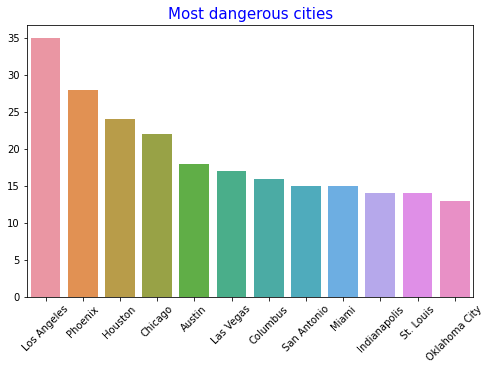

In [ ]:
# with seaborn barplot



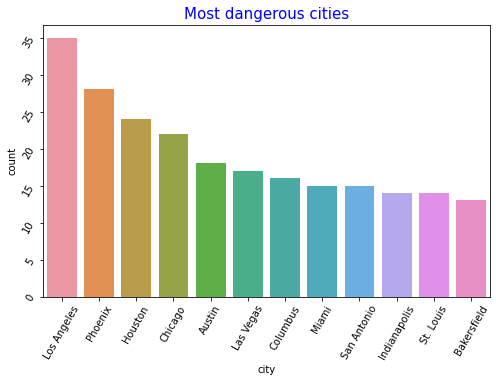

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=kill,x="city", order = kill['city'].value_counts().iloc[:12].index);
plt.tick_params(rotation=60)
plt.title("Most dangerous cities", color="blue", size=15);

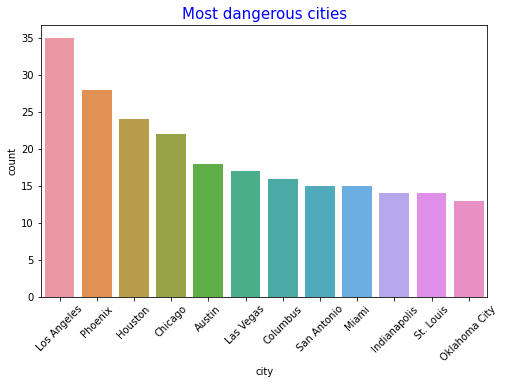

In [ ]:
# with seaborn countplot


## 3: Plot 20 most dangerous states

In [32]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [34]:
kill['state'].value_counts().iloc[:20]

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
PA     45
AL     45
VA     43
NY     43
WI     42
SC     41
Name: state, dtype: int64

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
PA     45
AL     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

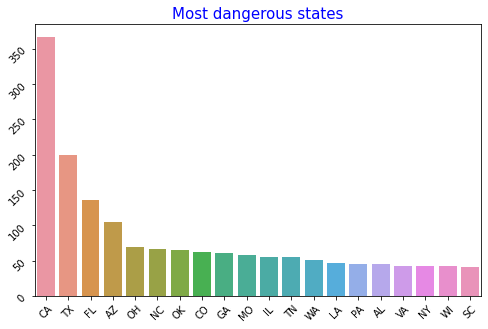

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(data=kill, y=kill['state'].value_counts().iloc[:20].values,x=kill['state'].value_counts().iloc[:20].index);
plt.tick_params(rotation=45)
plt.title("Most dangerous states", color="blue", size=15);

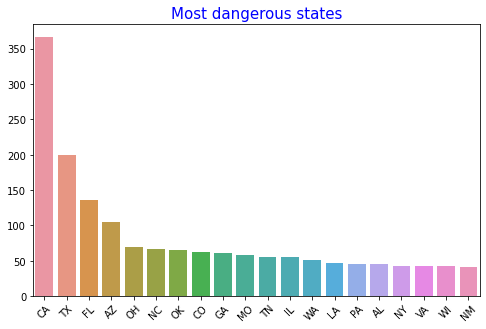

In [ ]:
# with seaborn barplot


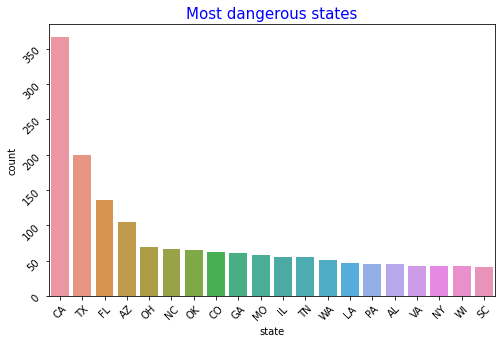

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=kill,x="state", order = kill['state'].value_counts().iloc[:20].index);
plt.tick_params(rotation=45)
plt.title("Most dangerous states", color="blue", size=15);

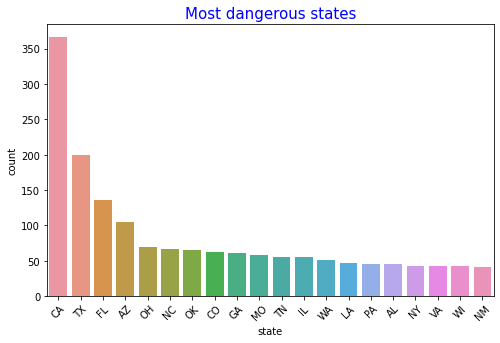

In [ ]:
# with seaborn countplot


## 4: Plot Having mental ilness or not for killed people

In [42]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [43]:
kill.signs_of_mental_illness.value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

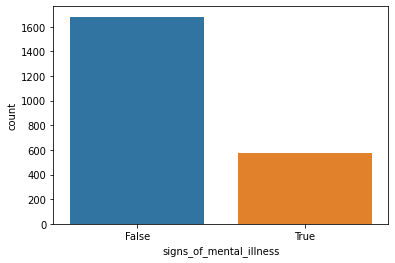

In [46]:
sns.countplot(data=kill,x="signs_of_mental_illness");

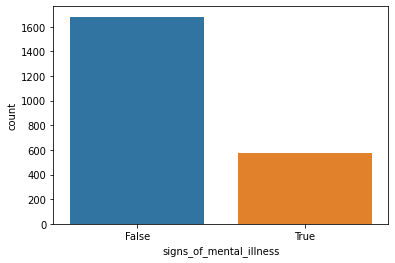

In [ ]:
# with seaborn


## 5: Plot number of Threat Types

In [47]:
kill.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

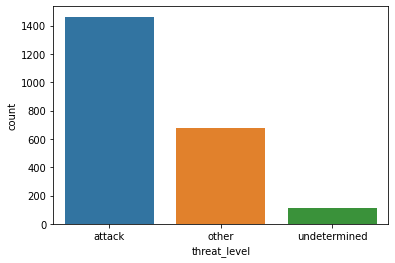

In [49]:
sns.countplot(data=kill, x="threat_level");

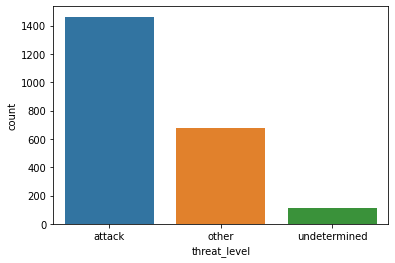

In [ ]:
# with seaborn


## 6: Plot number of Flee Types

In [50]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

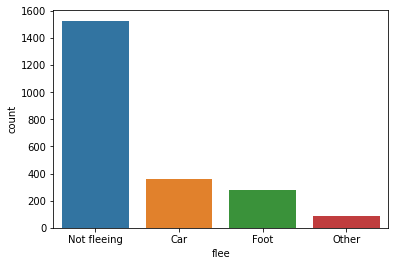

In [52]:
sns.countplot(data=kill,x="flee");

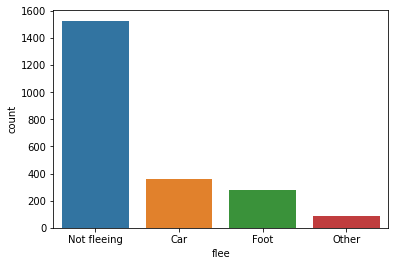

In [ ]:
# with seaborn
